In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

In [32]:
train_dir_path = 'data2/train/'
test_dir_path = 'data2/test/'
def Classes_Count(path, name):
    Classes_Dict = {}
    for Class in os.listdir(path):
        Full_Path = os.path.join(path, Class)
        if Class in ["positive", "negative"]:
            Classes_Dict[Class] = len(os.listdir(Full_Path))
    df = pd.DataFrame(Classes_Dict, index=[name]).transpose()
    return df

Train_Count = Classes_Count(train_dir_path, 'Train')
Test_Count = Classes_Count(test_dir_path, 'Test')
print(f"Train Count= \n{Train_Count} \n Test Count= \n{Test_Count}")


Train Count= 
          Train
negative   8825
positive   7215 
 Test Count= 
          Test
negative  2205
positive  1774


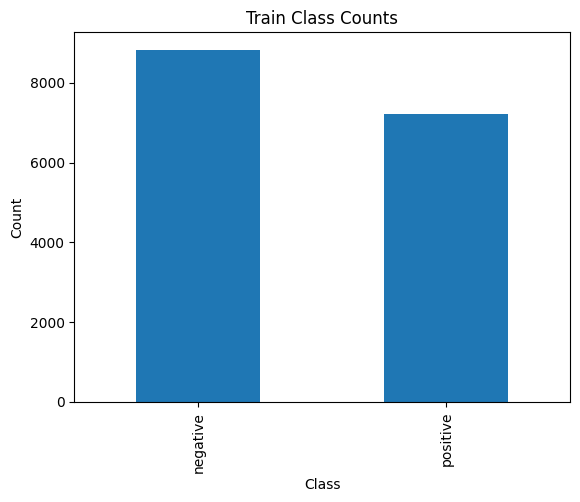

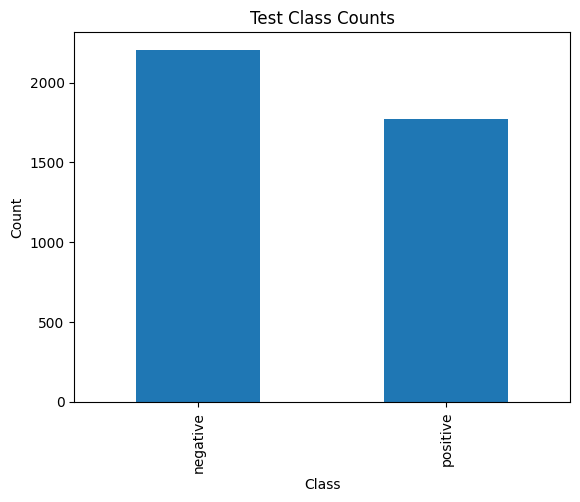

In [33]:
Train_Count.plot(kind='bar', legend=False)
plt.title('Train Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
Test_Count.plot(kind='bar', legend=False)
plt.title('Test Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [34]:
train_files = []
train_labels = []
test_files = []
test_labels = []
target_classes = ["positive", "negative"]
def filter_classes(class_name):
    return class_name in target_classes
for class_name in filter(filter_classes, os.listdir(train_dir_path)):
    class_path = os.path.join(train_dir_path, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        train_files.append(file_path)
        train_labels.append(class_name)
for class_name in filter(filter_classes, os.listdir(test_dir_path)):
    class_path = os.path.join(test_dir_path, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        test_files.append(file_path)
        test_labels.append(class_name)
train_df = pd.DataFrame({'File': train_files, 'Label': train_labels})
test_df = pd.DataFrame({'File': test_files, 'Label': test_labels})
print(f"Train Data: {train_df.head()}")
print(f"\nTest Data: {test_df.head()}")

Train Data:                                          File     Label
0  data2/train/negative\Training_10022789.jpg  negative
1  data2/train/negative\Training_10031481.jpg  negative
2  data2/train/negative\Training_10048646.jpg  negative
3  data2/train/negative\Training_10057152.jpg  negative
4  data2/train/negative\Training_10091569.jpg  negative

Test Data:                                            File     Label
0  data2/test/negative\PrivateTest_10131363.jpg  negative
1  data2/test/negative\PrivateTest_10247676.jpg  negative
2  data2/test/negative\PrivateTest_10304478.jpg  negative
3  data2/test/negative\PrivateTest_10455506.jpg  negative
4   data2/test/negative\PrivateTest_1054527.jpg  negative


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
filtered_train_labels = list(filter(lambda x: x in ["positive", "negative"], train_labels))
filtered_test_labels = list(filter(lambda x: x in ["positive", "negative"], test_labels))
train_labels_encoded = label_encoder.fit_transform(filtered_train_labels)
test_labels_encoded = label_encoder.transform(filtered_test_labels)
print(f"ENCODED TRAIN LABELS = {train_labels_encoded}")
print(f"ENCODED TEST LABELS = {test_labels_encoded}")
y_train_categorical = tf.keras.utils.to_categorical(train_labels_encoded)
y_test_categorical = tf.keras.utils.to_categorical(test_labels_encoded)

ENCODED TRAIN LABELS = [0 0 0 ... 1 1 1]
ENCODED TEST LABELS = [0 0 0 ... 1 1 1]


In [36]:
import cv2
example_image_path = train_df[train_df['Label'].isin(["positive", "negative"])]['File'].iloc[0]
image_shape = cv2.imread(example_image_path).shape
print(image_shape)

(48, 48, 3)


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['Label'])


print(train_df.shape)
print(val_df.shape)
print(test_df.shape)


datagen = ImageDataGenerator(rescale=1.0/255.0)
batch_size = 64
train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='File',
    y_col='Label',
    target_size=(image_shape[0], image_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_data = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='File',
    y_col='Label',
    target_size=(image_shape[0], image_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
val_data = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='File',
    y_col='Label',
    target_size=(image_shape[0], image_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


(12832, 2)
(3208, 2)
(3979, 2)
Found 12832 validated image filenames belonging to 2 classes.
Found 3979 validated image filenames belonging to 2 classes.
Found 3208 validated image filenames belonging to 2 classes.


In [52]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Build the CNN model
# model = Sequential()

# # Convolutional layer 1
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_shape[0], image_shape[1], 3)))
# model.add(MaxPooling2D(2, 2))

# # Convolutional layer 2
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Convolutional layer 3
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Flatten the output and feed it into dense layers
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(2, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

model = tf.keras.models.load_model('MODEL-SENTIMENT')


In [53]:
# history = model.fit(train_data, epochs=10, validation_data=val_data)


In [54]:
# history.history

In [55]:
# # Plotting the accuracy
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plotting the loss:
# plt.figure(figsize=(8, 5))
# plt.plot(history.history['loss'], label='Train loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.grid(True)
# plt.show()


In [56]:

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")

63/63 [==============================] - 3s 50ms/step - loss: 0.3517 - accuracy: 0.8683
Test Accuracy: 0.8683086037635803


In [57]:
# model.save('MODEL-SENTIMENT')

In [58]:
predictions = model.predict(test_data)
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

63/63 [==============================] - 3s 49ms/step


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

1/1 [==============================] - 0s 124ms/step


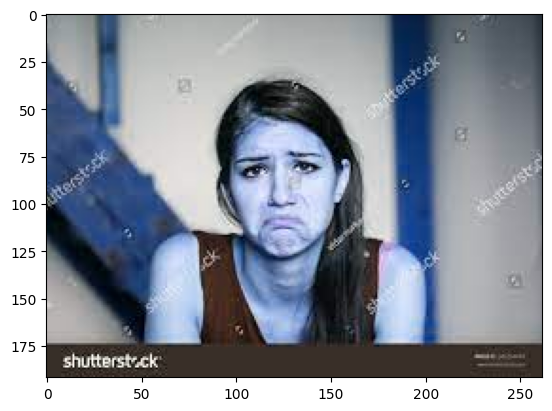

0.0036728631
Sentiment: negative


In [59]:
import cv2
import numpy as np

# Function to load and preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_shape[0], image_shape[1]))
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.astype('float32') / 255.0
    return image

# Path to the new image
image_path = "sadd3.jpeg"  # Replace with the actual image filename

# Load and preprocess the image
image = preprocess_image(image_path)

# Reshape the image to match the input shape of the model
image = np.expand_dims(image, axis=0)

# Perform sentiment prediction on the image
prediction = model.predict(image)

# Get the sentiment label
sentiment_label = 'positive' if prediction[0][0] > 0.5 else 'negative'
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()
# Print the prediction
print(prediction[0][0])
print("Sentiment:", sentiment_label)